# {정형_횡단_제목} 경진대회 베이스라인

## 1. 분석 환경 준비

### 1.1. 데이터 불러오기
먼저 분석하려는 데이터를 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를

데이터프레임이라고 하는 형식으로 편하게 다루도록 해주는 라이브러리입니다.

In [1]:
import pandas as pd ## pandas 라이브러리를 가져오기 위하여 import를 해줍니다.

# csv 형식으로 된 데이터 파일을 읽어옵니다.
df = pd.read_csv('data/train.csv')

print(f'train set은 {df.shape[1]} 개의 feature를 가진 {df.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')

# 데이터의 최상단 5 줄을 표시합니다.
df.head()

train set은 10 개의 feature를 가진 1253 개의 데이터 샘플로 이루어져 있습니다.


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## 2. 데이터 살펴보기

### 2.1. 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

In [2]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 존재하지 않습니다


## 3. 데이터 처리

### 3.1. {결측치 처리}

원활한 분석을 위해 적절하게 결측치들을 처리해 줍시다.

In [3]:
# 결측치가 있는 row들을 확인합니다.
df[df.isna().sum(axis=1) > 0]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target


카테고리형 데이터에 대해서는 행을 삭제하고

수치형 데이터에 대해서는 평균값을 채워주겠습니다.

In [4]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채워주었습니다.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

df = handle_na(df, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(df) 

결측치가 존재하지 않습니다


### 3.2. 데이터 인코딩

머신러닝 알고리즘은 문자열 데이터 속성을 입력받지 않으며 모든 데이터는 숫자형으로 표현되어야 합니다.

그래서 문자형 카테고리형 속성은 모두 숫자 값으로 변환/인코딩 되어야 합니다.

'Label Encoding' 을 적용하여 범주형 변수의 문자열을 수치형으로 표현해보겠습니다.

In [5]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

df = label_encoder(df, make_label_map(df))
df.head()

{'Gender': {'unknown': 0, 'M': 1, 'I': 2, 'F': 3}}


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,2,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


데이터들이 모두 숫자형으로 변환됨을 확인할 수 있습니다.

## 4. 데이터 분석 모델 생성

### 4.1. 변수 및 모델 정의

우리의 목적은 {} 이용하여 {} 를 예측하는 것입니다.

그럼 {} 데이터가 X, {}이 y가 되겠죠?

따라서 모델 학습을 위해 학습 데이터 {} 와 타겟인 {}을 분리해보도록 하겠습니다.

In [6]:
X = df.drop(['id', 'Target'], axis=1) # 분석에 필요 없는 id 와 예측하고자 하는 값을 제거해줍니다.
y = df['Target']

이렇게 X와 y를 잘 정의해주었습니다.

In [7]:
X.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100
1,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045
2,2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100
3,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370
4,2,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400


In [8]:
y.head()

0    15
1     8
2    18
3    13
4     6
Name: Target, dtype: int64

### 4.2. train 셋 val 셋 나누기

이제 우리는 모델을 만들어야 하는데,   
모델을 만들기 앞서 내가 만들 모델이 유의미한지 알아야 좋은 결론을 도출 할 수 있겠죠?   

<br> 

하지만 주어진 모든 데이터를 모델을 학습시켜 예측값을 도출하면,  
제출하여 결과가 나오기 전까지 모델이 적합한지 알 방법이 없습니다.   

<br> 

따라서 전체 데이터 셋에서  70%를 train 셋으로 분리시켜 학습을 시키는데 쓰고,    
나머지 30%를 val로 나누어 모델이 유의미한지 검증하는데 사용할 것입니다.   
이후 유의미하다면, 실제로 제출할 모델을 만들 때, 전체 데이터 100%를 학습을 시키면 되겠죠?

<br>

그럼 train 셋에서 학습시킬 셋 train_data와 검증할 셋 val_data를 만들어 보겠습니다.

In [9]:
from sklearn.model_selection import train_test_split

temp = df.drop('id', axis = 1).copy() #필요없는 id열 삭제
train, val = train_test_split(temp, test_size=0.3) #30프로로 설정
train.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val.reset_index(inplace=True)

In [10]:
print('학습시킬 train 셋 : ', train.shape)
print('검증할 val 셋 : ', val.shape)

학습시킬 train 셋 :  (877, 10)
검증할 val 셋 :  (376, 10)


In [11]:
train_X = train.drop(['Target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
train_y = train.Target #training 데이터에서 소비량 추출

val_X = val.drop(['Target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
val_y = val.Target #training 데이터에서 소비량 추출

### 4.3. 모델 학습

단순한 선형회귀 모델로 학습을 시켜 문제를 해결해보도록 하겠습니다.

sklearn에서 제공하는 선형회귀 모델을 사용하겠습니다.

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 정의
model.fit(train_X, train_y) # 학습

LinearRegression()

### 4.4 모델 예측

모델이 실제로 데이터를 얼마나 잘 맞추는지 확인해보겠습니다.

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    
    return score

y_hat = model.predict(val_X) # y예측
print(f'모델 NMAE: {nmae(val_y, y_hat)}')

모델 NMAE: 0.16384155737182166


NMAE 0.16는 대략 예측치와 실제값이 16% 정도의 오차율을 보인다는 것을 의미합니다.

### 4.5. 예측값 눈으로 확인

0.28라는 숫자만 봐서는 모델이 어떤방식으로 맞췄는지 어디에서 오차가 더 많이 나는지 알 수 없습니다.

모델을 개선시키기 위해서 어느 포인트에서 예측을 하지 못했는지 모델의 약점을 파악해보겠습니다.

plot으로 그래프를 그려서 어느정도 인사이트를 파악해 보겠습니다.

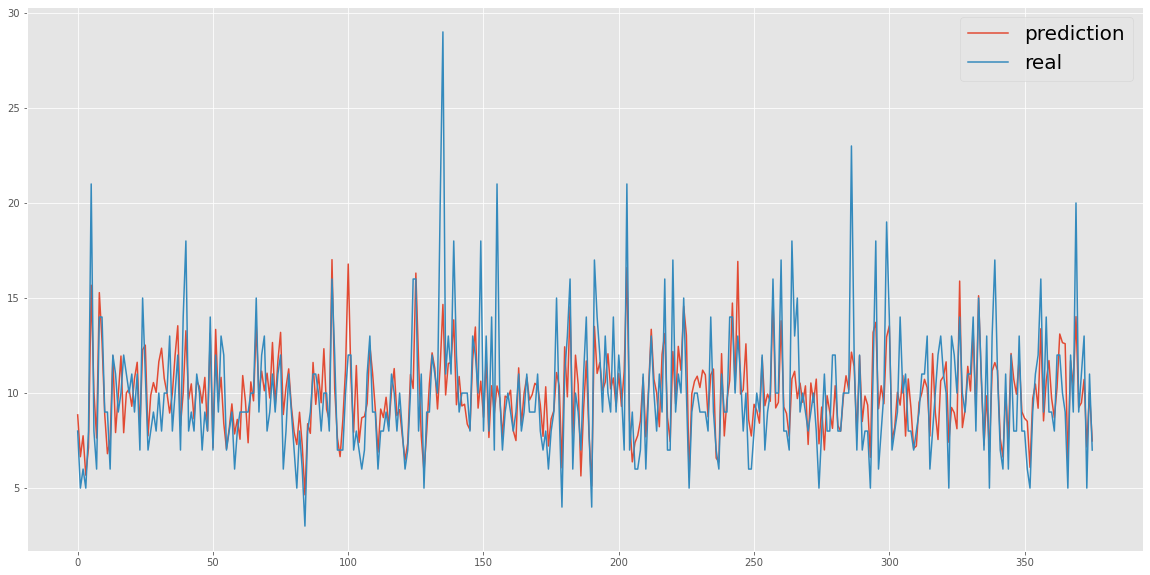

In [16]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(val_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

파란선이 실제 따릉이 소비량, 붉은 선이 우리의 모델이 예측한 값입니다.

우리의 모델이 어느정도 예측을 하고 있는것같나요?

{추가 인사이트 설명}

### 4.5 train 셋 + val 셋 100% 활용하는 모델 만들기

이제 검증 셋으로 성능이 유의미한지 확인을 하였다면 데이터를 100% 활용하기 위하여   
검증 셋을 포함한 train 셋을 만들어보겠습니다.

In [18]:
model = LinearRegression() # 모델 정의
model.fit(X, y) # 학습

LinearRegression()

## 5. 제출